In [3]:
import tensorflow as tf

from models.six_stage_linear_model import ModelMaker

In [4]:
model_maker=ModelMaker()
train_model,test_model=model_maker.create_models()

In [9]:
!mkdir .\tmp

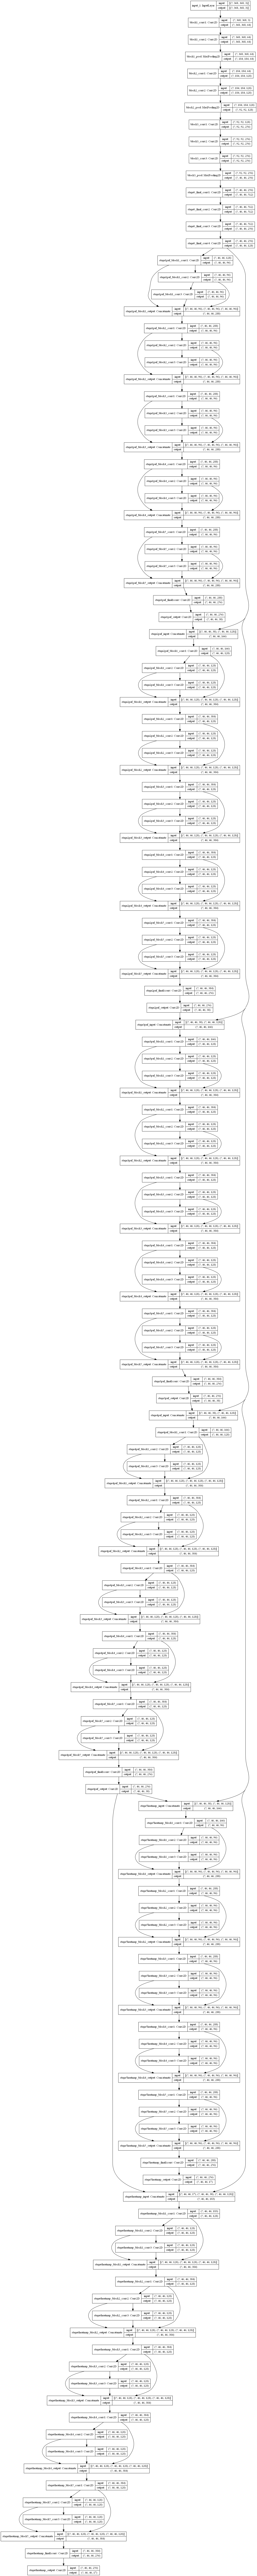

In [11]:
import pydot
tf.keras.utils.plot_model(train_model, to_file=r".\tmp\six_stage_linear_model.png", show_shapes=True)
#IPython.display.Image("test_keras_plot_model.png")

In [111]:
import numpy as np
y_pred=np.ones((5,10,10))
y_true=np.zeros((5,10,10))

In [15]:
@tf.function
def mse_2d_loss(y_true, y_pred):
    pixel_losses=tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.math.reduce_mean(pixel_losses,axis=-1)

In [127]:
mse_3d_loss(y_true,y_pred)

<tf.Tensor: id=64261, shape=(5,), dtype=float64, numpy=array([1., 1., 1., 1., 1.])>

In [12]:
train_model.output_names

['stage1paf_output',
 'stage2paf_output',
 'stage3paf_output',
 'stage4paf_output',
 'stage5heatmap_output',
 'stage6heatmap_output']

In [18]:
train_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=mse_2d_loss,
    metrics=["acc"])